In [28]:
import json
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.color'] = 'lightgrey'


Bad key "text.kerning_factor" on line 4 in
/home/atlas/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
DATASET_PATH = "Data/data_10.json"

In [6]:
def load_data(dataset_path):
    with open(dataset_path, "r") as fp: # open for reading
        data = json.load(fp)
        
    # convert lists into numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    
    return inputs, targets

# load the dataset
if __name__ == "__main__":
    inputs, targets = load_data(dataset_path=DATASET_PATH)

In [7]:
inputs.shape

(9896, 130, 13)

In [17]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2)

In [22]:
# build the network architecture
model = keras.Sequential([
    # input layer
    keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])), # inputs is 3D array, so shape[1] represents the individual segments. 
    
    # 1st hidden layer
    # Rectified Linear Unit, funct of h, which is the net input. ReLU provides better convergence by reducing likelihood of vanishing gradient
    keras.layers.Dense(512, activation="relu"), 
    
    # 2nd hidden layer
    keras.layers.Dense(256, activation="relu"),
    
    # 3rd hidden layer
    keras.layers.Dense(64, activation="relu"),
    
    # output layer
    keras.layers.Dense(10, activation="softmax") # 10 because there are 10 genres. 
])

In [23]:
# compile network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [24]:
model.summary
# train network
genre_model = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=150,
          batch_size=32,
          callbacks= keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  verbose=1,
                                                  patience=4,
                                                  restore_best_weights=True)
         )

Epoch 1/150
248/248 [==============================] - 2s 7ms/step - loss: 8.7942 - accuracy: 0.3311 - val_loss: 4.5915 - val_accuracy: 0.3667
Epoch 2/150
248/248 [==============================] - 2s 6ms/step - loss: 3.1368 - accuracy: 0.4233 - val_loss: 2.9720 - val_accuracy: 0.4131
Epoch 3/150
248/248 [==============================] - 2s 6ms/step - loss: 2.2217 - accuracy: 0.4827 - val_loss: 2.5103 - val_accuracy: 0.4379
Epoch 4/150
248/248 [==============================] - 2s 6ms/step - loss: 1.7799 - accuracy: 0.5327 - val_loss: 2.2952 - val_accuracy: 0.4667
Epoch 5/150
248/248 [==============================] - 2s 6ms/step - loss: 1.4489 - accuracy: 0.5863 - val_loss: 2.3514 - val_accuracy: 0.4384
Epoch 6/150
248/248 [==============================] - 2s 6ms/step - loss: 1.2594 - accuracy: 0.6238 - val_loss: 2.2376 - val_accuracy: 0.5005
Epoch 7/150
248/248 [==============================] - 2s 6ms/step - loss: 1.0987 - accuracy: 0.6640 - val_loss: 2.1760 - val_accuracy: 0.4747

In [30]:
metrics = genre_model.history


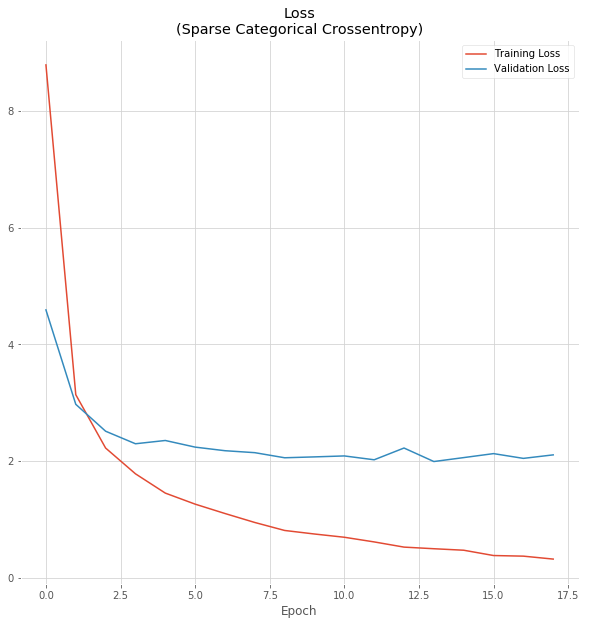

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(genre_model.epoch, metrics['loss'], metrics['val_loss'])

plt.title('Loss\n(Sparse Categorical Crossentropy)')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
# ax.set_ylim(0.0,0.4)
plt.show()